In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from xgboost import XGBRegressor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("maajdl/yeh-concret-data")

print("Path to dataset files:", path)

100%|██████████| 10.2k/10.2k [00:00<00:00, 11.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/maajdl/yeh-concret-data/versions/1


In [21]:
df = pd.read_csv(f"{path}/Concrete_Data_Yeh.csv")
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [46]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

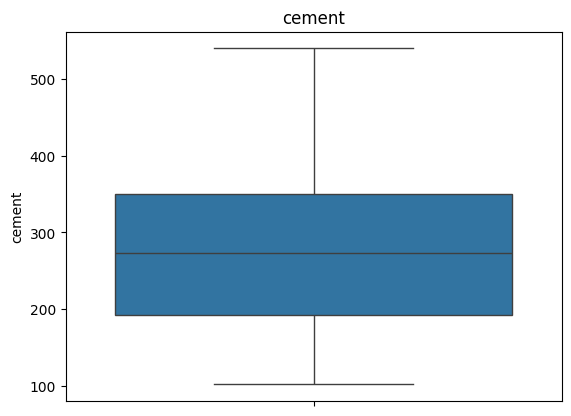

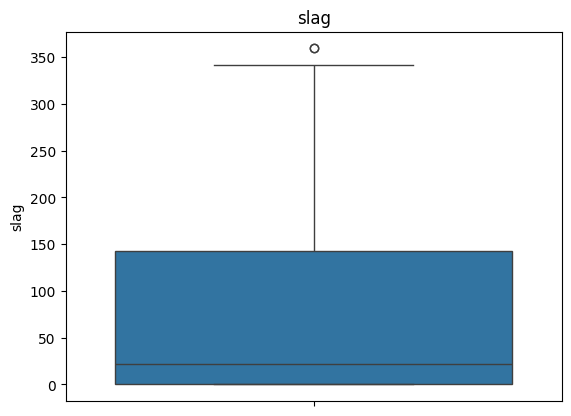

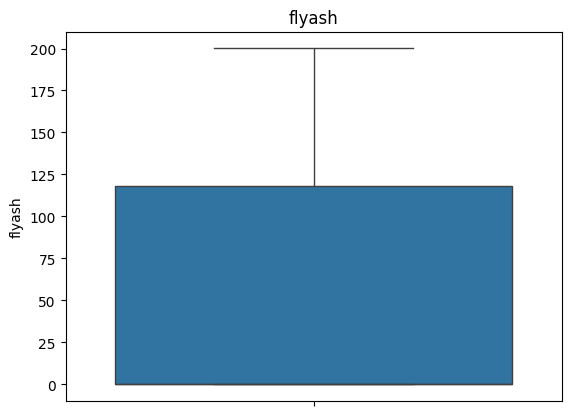

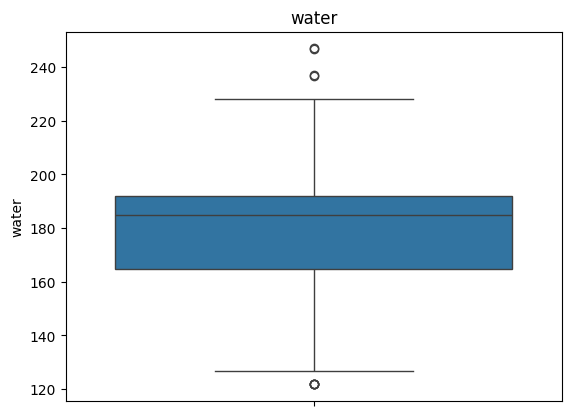

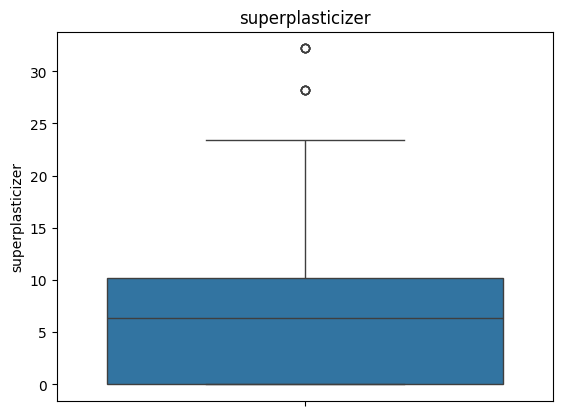

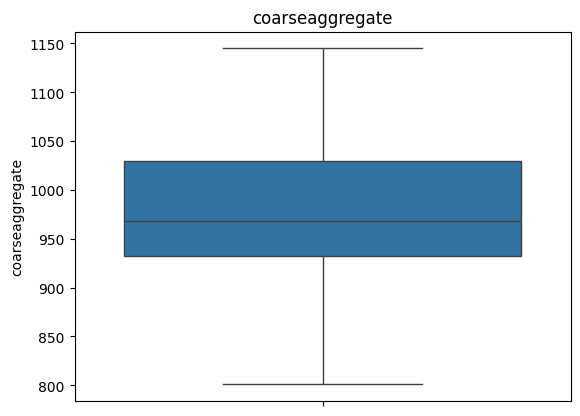

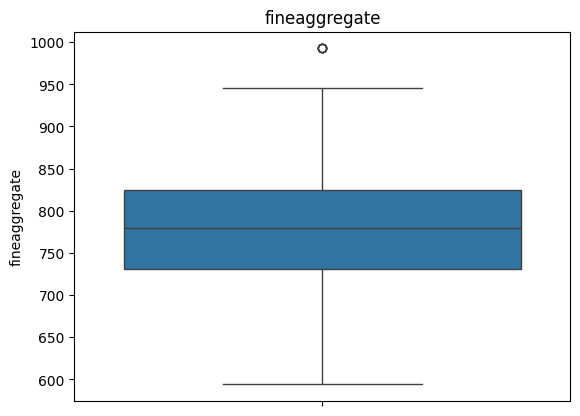

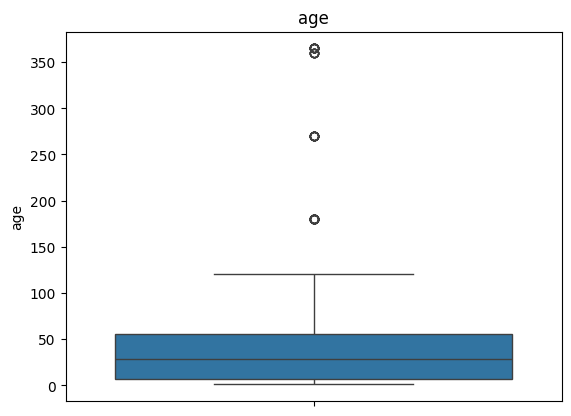

In [33]:
for i in df.columns[:-1]:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

<Axes: >

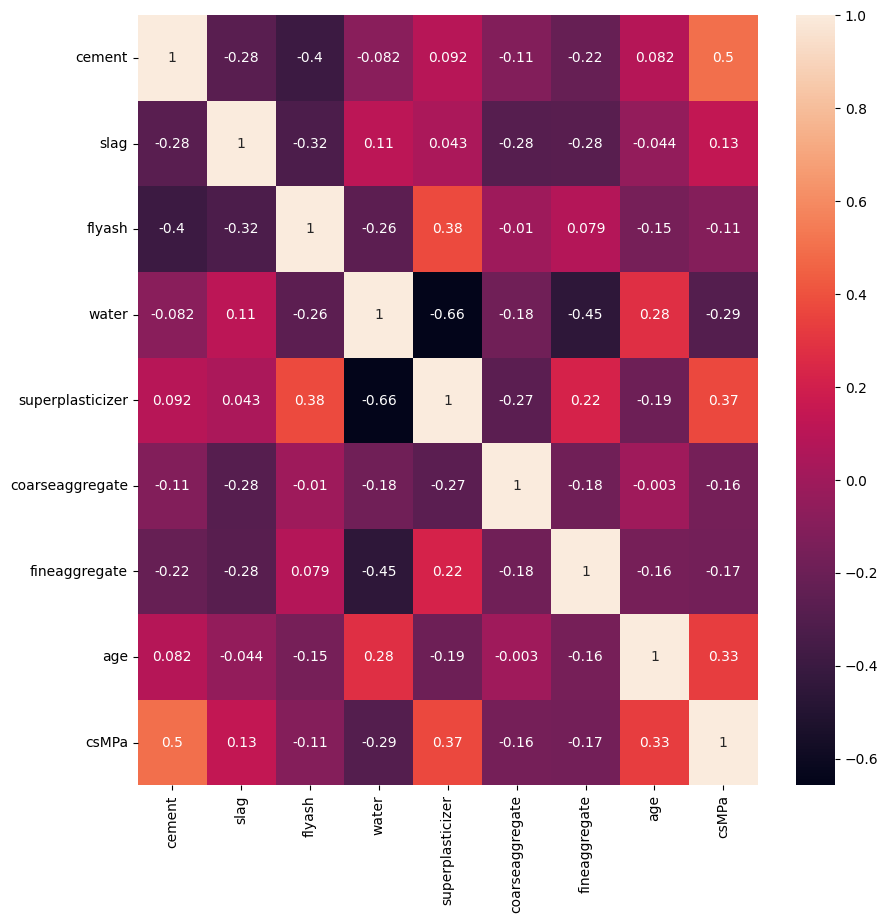

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [35]:
for i in df.columns[:-1]:
  df[i] = df[i].clip(lower=df[i].quantile(0.25),upper=df[i].quantile(0.75))

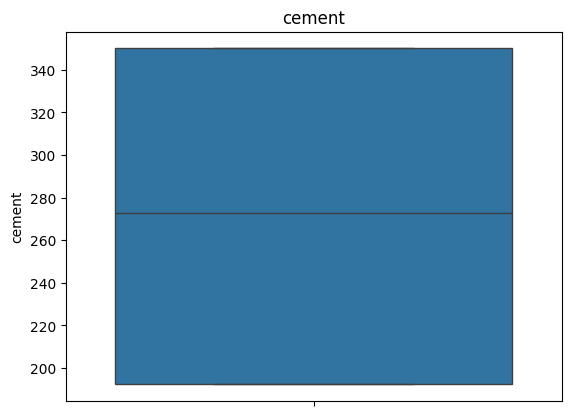

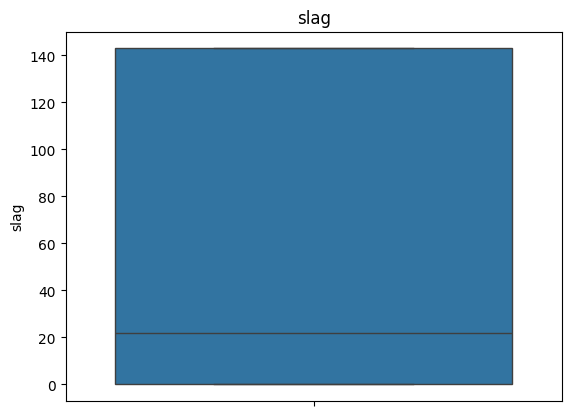

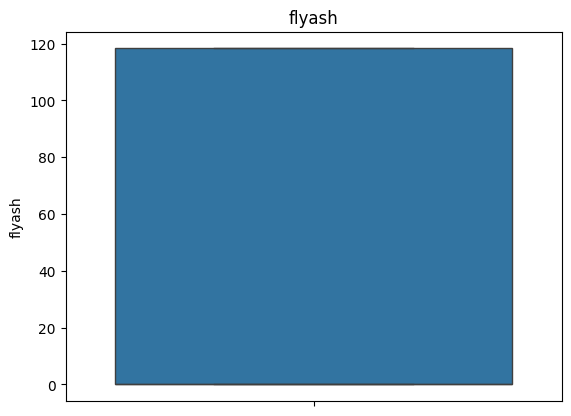

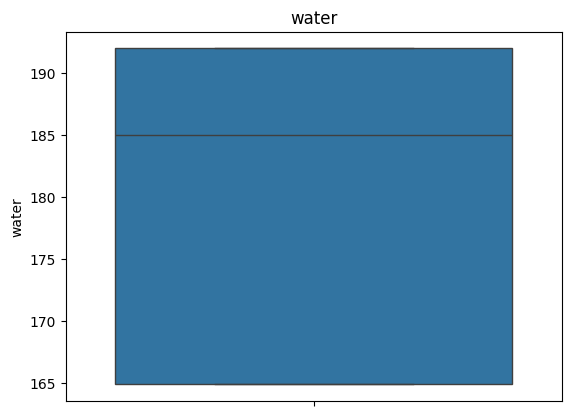

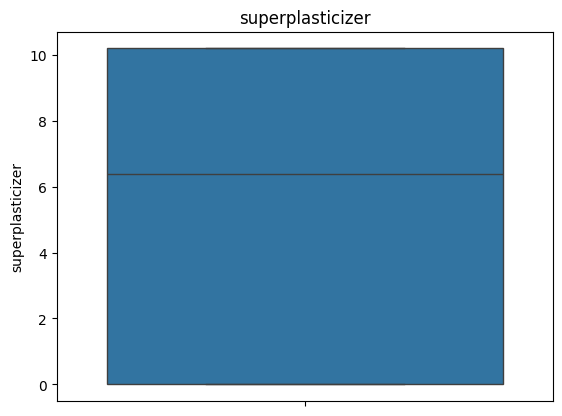

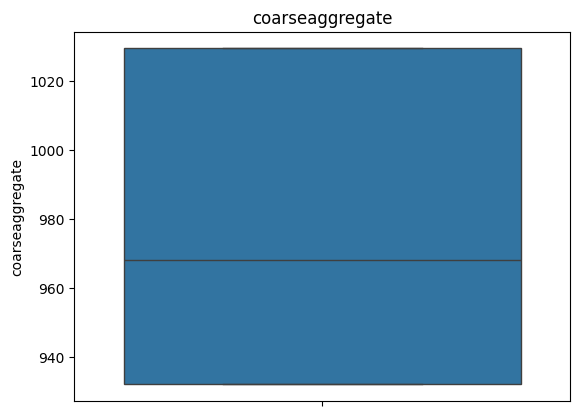

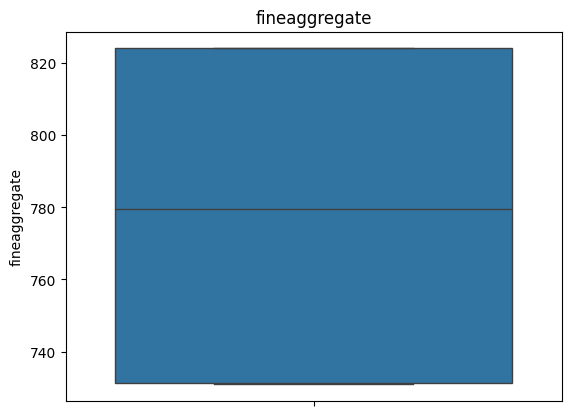

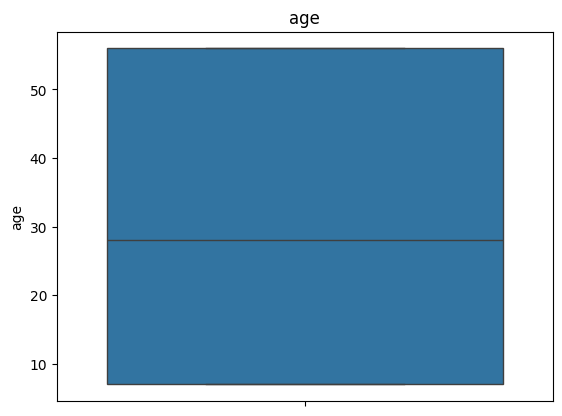

In [36]:
for i in df.columns[:-1]:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

In [37]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=18)

In [39]:
model_x = XGBRegressor(n_estimators=100,learning_rate =0.1, max_depth = 3,subsample=0.8,colsample_bytree = 0.8)

In [40]:
model_x.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [41]:
pred_x = model_x.predict(x_test)

In [42]:
print(f"The mean Squared Error is {mean_squared_error(y_test,pred_x):.2f}")
print(f"The R2 Score is {r2_score(y_test,pred_x):.2f}")

The mean Squared Error is 39.30
The R2 Score is 0.85


In [43]:
import pickle

In [44]:
with open("best_model.pkl","wb") as f:
    pickle.dump(model,f)